In [2]:
from torchvision import models

In [2]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [3]:
resnet = models.resnet101( weights=models.ResNet101_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to C:\Users\HW/.cache\torch\hub\checkpoints\resnet101-cd907fc2.pth
100.0%


In [4]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### 预处理函数
将图片缩放到 256 X 256 个像素，围绕中心将图像裁剪为 224 X 224 个像素，并将其转换为一个张量，对其RGB分量（红色、绿色和蓝色）进行归一化处理，使其具有定义的均值和标准差。

In [5]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [6]:
from PIL import Image

In [35]:
img = Image.open('../data/1/dog1.jpg')

> <p style="color: red; font-weight: bold;">注意：图片的位深度必须是24，不然在预处理的时候会报错！</p>

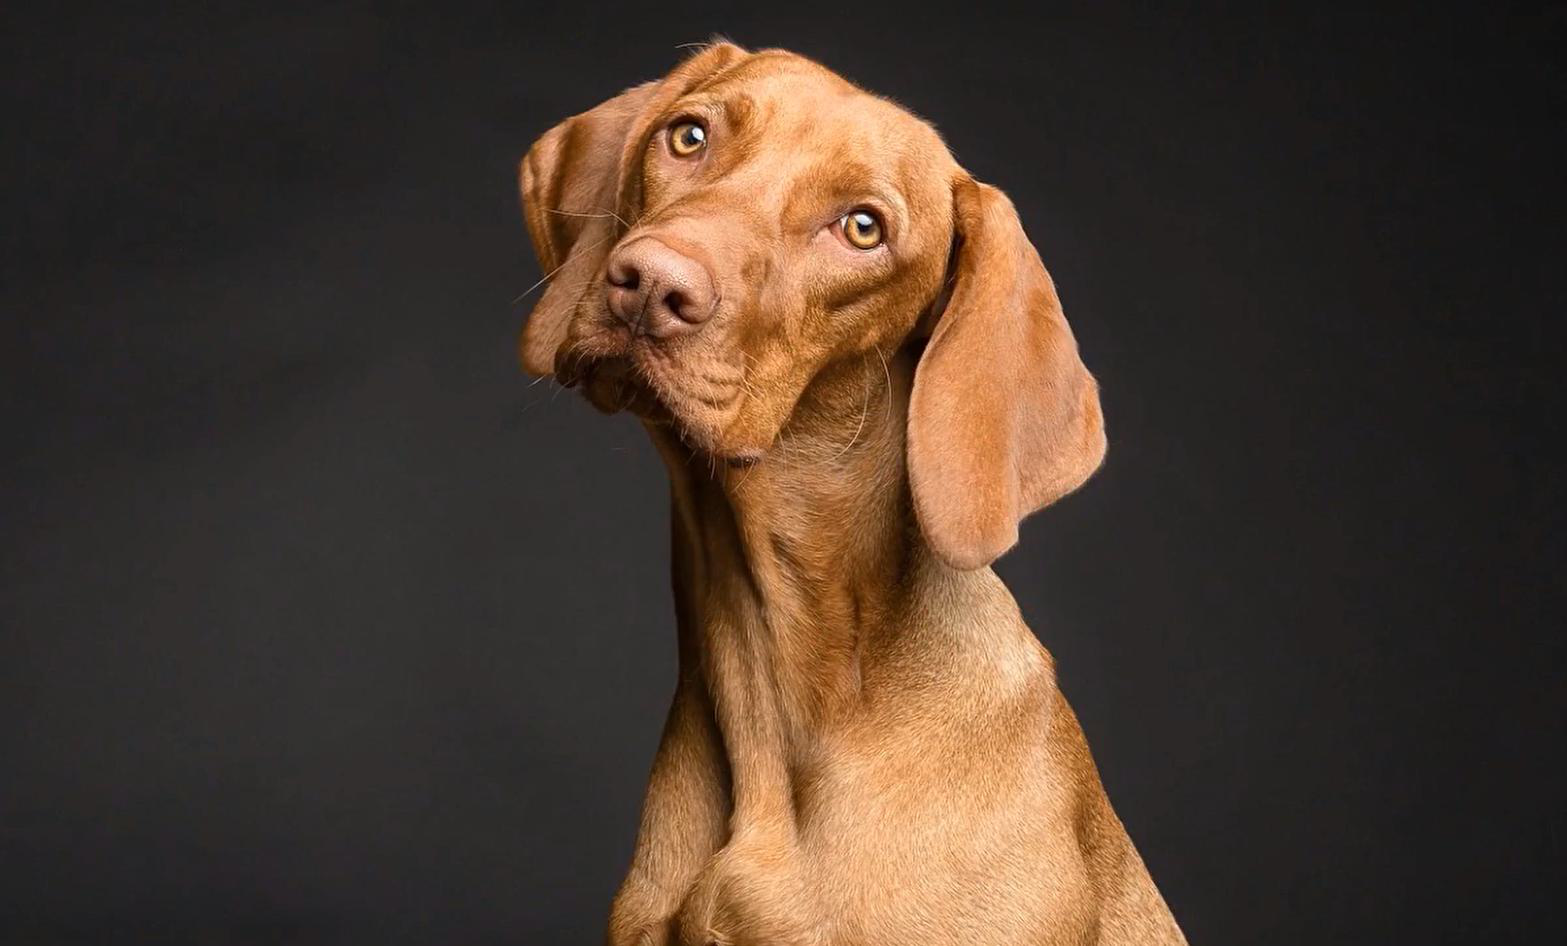

In [36]:
img

In [37]:
img_t = preprocess(img)

In [38]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

In [39]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [40]:
out = resnet(batch_t)

In [41]:
out_show = out.detach().numpy()
out_show

array([[ 1.14298806e-01,  2.24431232e-02,  5.80392145e-02,
        -1.22321725e-01, -1.04419276e-01,  4.39950675e-01,
        -3.41607481e-01, -1.18462615e-01, -1.60559975e-02,
         2.71647815e-02, -1.30462676e-01, -1.29202366e-01,
         3.49372365e-02, -1.29655683e-02, -1.16390912e-02,
         1.17800772e-01, -9.92977694e-02, -2.93907821e-02,
        -8.11402779e-03,  7.37909228e-02, -5.30261993e-02,
         1.59644052e-01,  3.06727618e-01,  7.46973678e-02,
        -1.06496036e-01,  4.48246859e-02,  2.17472743e-02,
         1.13949031e-01, -1.01438165e-01, -2.23625898e-01,
        -2.03623205e-01,  2.87715495e-02,  8.97322036e-03,
        -1.22583270e-01,  2.32196853e-01, -2.31121272e-01,
         5.12317717e-01, -1.89058185e-01, -1.64103687e-01,
        -6.39915764e-02,  3.13638337e-03,  3.45067173e-01,
         1.89172968e-01,  6.14698827e-02,  6.44577369e-02,
         4.76995134e-04, -9.55714732e-02,  6.68174401e-02,
        -6.87792711e-03, -4.16253433e-02,  1.15039110e-0

In [42]:
with open('D:/Code/PythonCode/pytorch-deep-learning-action/data/1/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [43]:
_, index = torch.max(out, 1)
index

tensor([211])

In [44]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
percentage

tensor([2.4930e-02, 2.2742e-02, 2.3566e-02, 1.9677e-02, 2.0032e-02, 3.4526e-02,
        1.5802e-02, 1.9753e-02, 2.1883e-02, 2.2849e-02, 1.9517e-02, 1.9542e-02,
        2.3028e-02, 2.1951e-02, 2.1980e-02, 2.5017e-02, 2.0135e-02, 2.1593e-02,
        2.2057e-02, 2.3940e-02, 2.1089e-02, 2.6086e-02, 3.0219e-02, 2.3962e-02,
        1.9991e-02, 2.3256e-02, 2.2726e-02, 2.4921e-02, 2.0092e-02, 1.7781e-02,
        1.8140e-02, 2.2886e-02, 2.2437e-02, 1.9672e-02, 2.8049e-02, 1.7648e-02,
        3.7117e-02, 1.8406e-02, 1.8872e-02, 2.0859e-02, 2.2307e-02, 3.1400e-02,
        2.6868e-02, 2.3647e-02, 2.3718e-02, 2.2248e-02, 2.0210e-02, 2.3774e-02,
        2.2085e-02, 2.1330e-02, 2.4948e-02, 2.0423e-02, 4.2430e-02, 3.3360e-02,
        3.7931e-02, 1.5483e-02, 3.3145e-02, 1.9108e-02, 2.1271e-02, 3.6664e-02,
        1.1628e-02, 1.2173e-01, 1.3356e-02, 3.3401e-02, 1.7720e-02, 2.1354e-02,
        4.0928e-02, 2.4419e-02, 1.4372e-02, 2.4138e-02, 1.9248e-02, 3.2045e-02,
        2.4891e-02, 2.6975e-02, 2.3809e-

In [45]:
labels[index[0]], percentage[index[0]].item()

('vizsla, Hungarian pointer', 75.68617248535156)

In [46]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('vizsla, Hungarian pointer', 75.68617248535156),
 ('Rhodesian ridgeback', 1.1690071821212769),
 ('Weimaraner', 0.30026164650917053),
 ('boa constrictor, Constrictor constrictor', 0.12172502279281616),
 ('German short-haired pointer', 0.07908415794372559)]